<a href="https://colab.research.google.com/github/2cdsdc/sanket-machinelearning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
altruistdelhite04_gold_price_data_path = kagglehub.dataset_download('altruistdelhite04/gold-price-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gold-price-data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

Data Collection and Processing


In [ ]:
gold_dataset = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [ ]:
gold_dataset.shape

(2290, 6)

In [ ]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_dataset['Date'].values

array(['1/2/2008', '1/3/2008', '1/4/2008', ..., '5/10/2018', '5/14/2018',
       '5/16/2018'], dtype=object)

In [ ]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_dataset = gold_dataset.drop(['Date'], axis=1)

finding correlation

In [ ]:
correlation = gold_dataset.corr()

<Axes: >

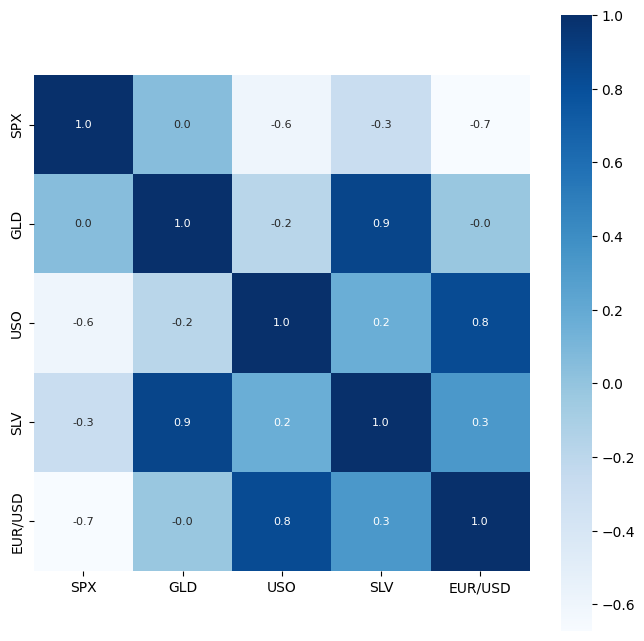

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar= True, square=True, fmt='.1f', annot=True, annot_kws = {'size':8}, cmap='Blues' )

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_31/2713261846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='green')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

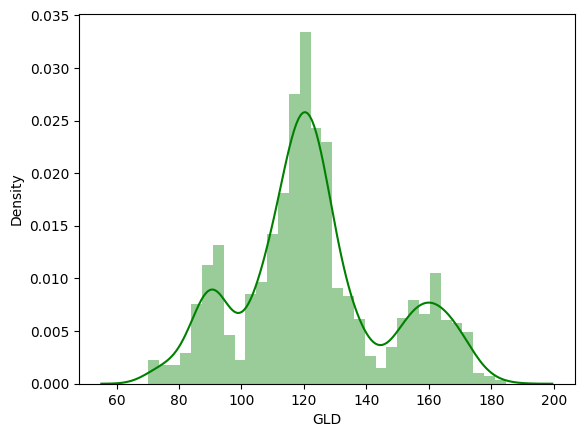

In [ ]:
sns.distplot(gold_dataset['GLD'], color='green')

Seprating training and test data

In [ ]:
x = gold_dataset.drop(['GLD'],axis=1)
y = gold_dataset['GLD']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1 , random_state = 2)

In [ ]:
x_train.shape

(2061, 4)

model training

RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
prediction = regressor.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_test, prediction)
print('error_score :', error_score)

error_score : 0.990364957751096


compare the actual value and predicted value

In [ ]:
y_test = list(y_test)

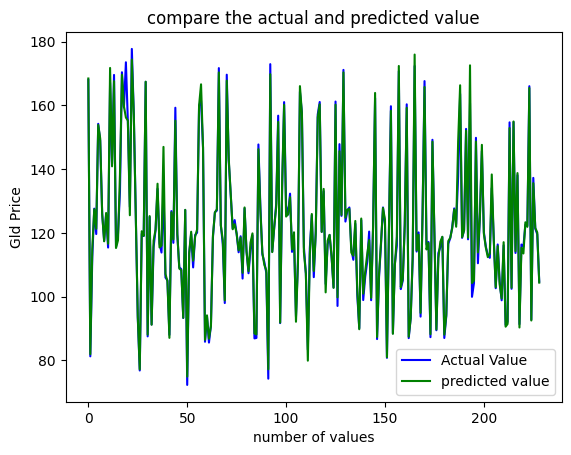

In [ ]:
plt.plot(y_test , color = 'blue', label  = 'Actual Value')
plt.plot(prediction , color = 'green', label = 'predicted value')
plt.title('compare the actual and predicted value')
plt.xlabel('number of values')
plt.ylabel('Gld Price')
plt.legend()
plt.show()